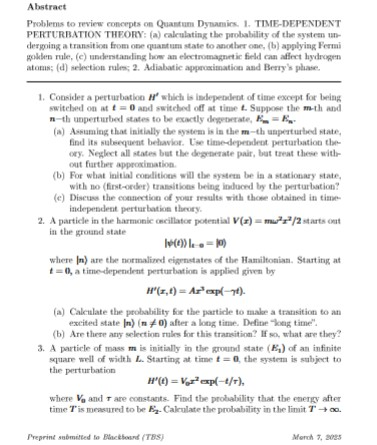

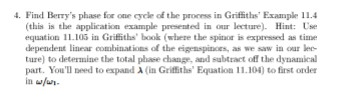

In [2]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
from matplotlib.animation import FuncAnimation
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

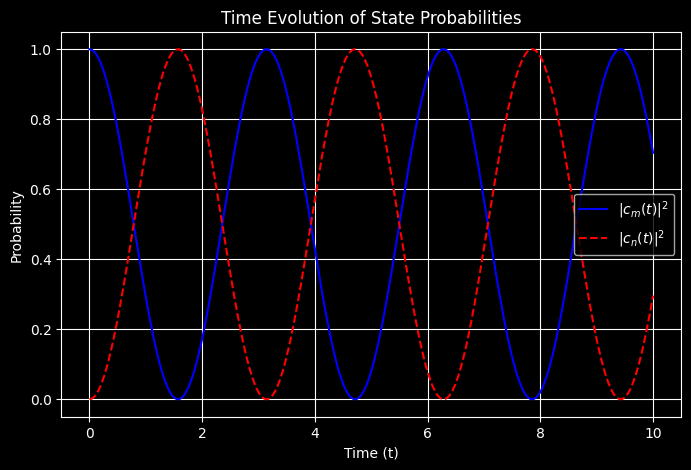

coefficients are: 



cos(V*t/hbar)

-I*sin(V*t/hbar)

Max deviation from probability sum of 1: 0.00


In [3]:
##problem 1
#numerically first will go into graph

#params, will use arb units
hbar = 1
V = 1
t_vals = np.linspace(0, 10, 500)

#compute coeff
c_m = np.cos(V * t_vals / hbar)
c_n = -1j * np.sin(V * t_vals / hbar)  #e^(iθ) = 1 for simplicity

#plt
plt.figure(figsize=(8, 5))
plt.plot(t_vals, np.abs(c_m)**2, label=r'$|c_m(t)|^2$', linestyle='-', color='b')
plt.plot(t_vals, np.abs(c_n)**2, label=r'$|c_n(t)|^2$', linestyle='--', color='r')
plt.xlabel('Time (t)')
plt.ylabel('Probability')
plt.title('Time Evolution of State Probabilities')
plt.legend()
plt.grid()
plt.savefig('p1_T_evo_of_state_probs.png')
plt.show()


#vars
t, V, hbar = sp.symbols('t V hbar', real=True, positive=True)

#time dependent coefficients
c_m_sym = sp.cos(V * t / hbar)
c_n_sym = -sp.I * sp.sin(V * t / hbar)  # Assuming e^(iθ) = 1

#check symbolically for probability conservation
prob_sum_sym = sp.simplify(sp.Abs(c_m_sym)**2 + sp.Abs(c_n_sym)**2)

#show symbolically
print('coefficients are: \n')
display(c_m_sym, c_n_sym)

#verify numerically for probability conservation
prob_sum = np.abs(c_m)**2 + np.abs(c_n)**2
print(f"Max deviation from probability sum of 1: {np.max(np.abs(prob_sum - 1)):.2f}")

In [4]:
#step 1 def hamiltonian in degen subspace
H_prime = sp.Matrix([[sp.Symbol('epsilon', real=True), V], 
                     [V, sp.Symbol('epsilon', real=True)]])

#solve eigevalues of H'
eigenvalues = H_prime.eigenvals()
print('eigenvalues of H:')
display(eigenvalues)


#solve for evects of H'
eigenvectors = H_prime.eigenvects()
print('the eigenvectors of H:\n\n')
sp.pprint(eigenvectors)


#def coupled diffeq for t-evo
c_m, c_n = sp.Function('c_m')(t), sp.Function('c_n')(t)
eq1 = sp.Eq(sp.I * hbar * sp.diff(c_m, t), V * c_n)
eq2 = sp.Eq(sp.I * hbar * sp.diff(c_n, t), V * c_m)
print('coupled diffeqs are:')
display(eq1,eq2)

#sympy solve it
solution = sp.dsolve([eq1, eq2], [c_m, c_n])
print('The solution:\n\n')
sp.pprint(solution)

#solve for c1 and c2 bc we know c_m(0) = 1, c_n(0) = 0
initial_conditions = [
    solution[0].subs(t, 0).rhs - 1,  #c_m(0) = 1
    solution[1].subs(t, 0).rhs       #c_n(0) = 0
]

#solve and print
C_values = sp.solve(initial_conditions, ['C1', 'C2'])
print('the values for C are:')
display(C_values)




eigenvalues of H:


{V + epsilon: 1, -V + epsilon: 1}

the eigenvectors of H:


⎡⎛           ⎡⎡-1⎤⎤⎞  ⎛          ⎡⎡1⎤⎤⎞⎤
⎢⎜-V + ε, 1, ⎢⎢  ⎥⎥⎟, ⎜V + ε, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝           ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1⎦⎦⎠⎦
coupled diffeqs are:


Eq(I*hbar*Derivative(c_m(t), t), V*c_n(t))

Eq(I*hbar*Derivative(c_n(t), t), V*c_m(t))

The solution:


⎡            -ⅈ⋅V⋅t        ⅈ⋅V⋅t              -ⅈ⋅V⋅t        ⅈ⋅V⋅t⎤
⎢            ───────       ─────              ───────       ─────⎥
⎢               h̅            h̅                   h̅            h̅  ⎥
⎣cₘ(t) = C₁⋅ℯ        - C₂⋅ℯ     , cₙ(t) = C₁⋅ℯ        + C₂⋅ℯ     ⎦
the values for C are:


{C1: 1/2, C2: -1/2}

In [5]:
#problem 2
#redef symbols to clear
A, hbar, gamma, omega, m = sp.symbols('A hbar gamma omega m', real=True, positive=True)
n = sp.symbols('n', integer=True, positive=True)
x = sp.Symbol('x', real=True)
a, a_dag = sp.symbols('a a_dag')

#position ladder operator for x1
x_op = sp.sqrt(hbar / (2 * m * omega)) * (a + a_dag)

#x**2
x2_op = x_op**2

#we now want matrix element <n|x^2|0>
n0_matrix_element = sp.simplify(sp.expand(x2_op))

#compute transition prob
omega_n0 = n * omega
prob_0_to_n = (A**2 * n0_matrix_element**2) / (hbar**2 * (gamma**2 + omega_n0**2))
display(prob_0_to_n)


A**2*(a**2 + 2*a*a_dag + a_dag**2)**2/(4*m**2*omega**2*(gamma**2 + n**2*omega**2))

In [6]:
#this is all i can do until next lecture

In [7]:
#vars problem 3, will use sympy first to solve all
L, x = sp.symbols('L x', real=True, positive=True)
V0, tau, hbar, omega21 = sp.symbols('V0 tau hbar omega21', real=True, positive=True)

#def of wavefunction
phi_1 = sp.sqrt(2/L) * sp.sin(sp.pi * x / L)
phi_2 = sp.sqrt(2/L) * sp.sin(2 * sp.pi * x / L)
print('wavefunction 1 and 2 are:\n')
display(phi_1,phi_2)


#compute matrix element of <2|x^2|1>
x_squared = x**2
matrix_element = sp.integrate(phi_2 * x_squared * phi_1, (x, 0, L))
print('the matrix element<2|x^2|1> is:')
display(matrix_element)

#compute prob expression
probability = (V0/hbar)**2 * matrix_element**2 / ((1/tau)**2 + omega21**2)
print('the probability expression is:')
display(probability.simplify())



wavefunction 1 and 2 are:



sqrt(2)*sin(pi*x/L)/sqrt(L)

sqrt(2)*sin(2*pi*x/L)/sqrt(L)

the matrix element<2|x^2|1> is:


-16*L**2/(9*pi**2)

the probability expression is:


256*L**4*V0**2*tau**2/(81*pi**4*hbar**2*(omega21**2*tau**2 + 1))

In [8]:
##p4
#clear and def symbols
omega, omega1 = sp.symbols('omega omega1', real=True, positive=True)

#effective frequency
omega_eff = sp.sqrt(omega1**2 + omega**2)

#berry phase with exact formula
gamma_exact = sp.pi * (1 - omega1 / omega_eff)

#expanded to first order
gamma_approx = sp.series(gamma_exact, omega, n=3).removeO() #second

#print and display
print('gamma and gamma approx are:')
display(gamma_exact, gamma_approx)


gamma and gamma approx are:


pi*(-omega1/sqrt(omega**2 + omega1**2) + 1)

pi*omega**2/(2*omega1**2)

-16*L**2/(9*pi**2)

exp(-t/tau)*exp(I*omega*t)

Piecewise((I*tau/(omega*tau + I), Abs(arg(omega) - pi/2) <= pi/2), (Integral(exp(t*(I*omega - 1/tau)), (t, 0, oo)), True))

Piecewise((-16*L**2*V0*tau/(9*pi**2*hbar*(omega*tau + I)), (Abs(2*arg(omega) - pi) <= pi) | (Abs(arg(I*omega*tau - 1) + pi) < pi/2)), (16*I*L**2*V0*Integral(exp(t*(I*omega*tau - 1)/tau), (t, 0, oo))/(9*pi**2*hbar), True))

Piecewise((256*L**4*V0**2*tau**2/(81*pi**4*hbar**2*(omega**2*tau**2 + 1)), (Abs(2*arg(omega) - pi) <= pi) | (Abs(arg(I*omega*tau - 1) + pi) < pi/2)), (256*L**4*V0**2*Abs(Integral(exp(t*(I*omega*tau - 1)/tau), (t, 0, oo)))**2/(81*pi**4*hbar**2), True))

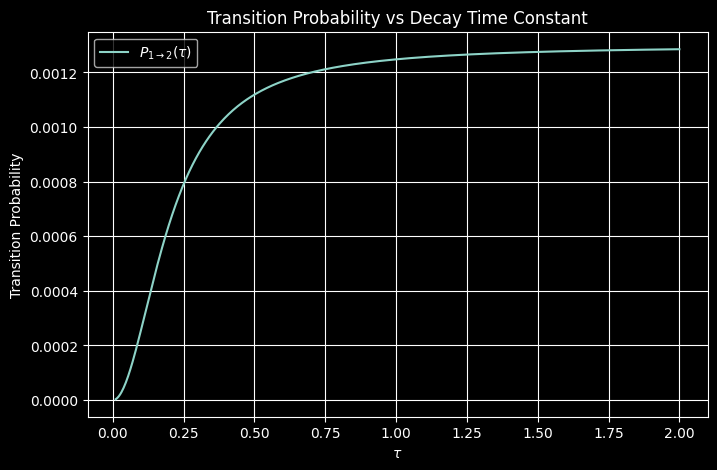

In [9]:
## problem 3

#symbols
t, T, tau = sp.symbols('t T tau', real=True, positive=True)
V0, L, hbar = sp.symbols('V0 L hbar', real=True, positive=True)
omega = sp.symbols('omega', real=True)
pi = sp.pi

#matrix element from my hand calculation
matrix_element = -16*L**2 / (9*pi**2)

#time-dependent part of amplitude integral
integrand = sp.exp(sp.I * omega * t) * sp.exp(-t / tau)
integral_result = sp.integrate(integrand, (t, 0, sp.oo))
integral_result_simplified = sp.simplify(integral_result)

#full amplitude
c_2_1 = (V0 * matrix_element / (sp.I * hbar)) * integral_result_simplified
c_2_1_simplified = sp.simplify(c_2_1)

#probability
P = sp.simplify(sp.Abs(c_2_1_simplified)**2)

display(matrix_element,integrand,integral_result_simplified,c_2_1_simplified,P)

#arbitrary numerical display P v. Tau
# constants
V0_val = 1
L_val = 1
hbar_val = 1
omega_val = 5

#tau values
tau_vals = np.linspace(0.01, 2, 500)

#probability formula
P_vals = (256 * V0_val**2 * L_val**4 * tau_vals**2) / (81 * np.pi**4 * hbar_val**2 * (omega_val**2 * tau_vals**2 + 1))

#plot
plt.figure(figsize=(8,5))
plt.plot(tau_vals, P_vals, label=r'$P_{1 \to 2}(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel('Transition Probability')
plt.title('Transition Probability vs Decay Time Constant')
plt.grid(True)
plt.legend()
plt.savefig('p3_transition_v_tau.png',dpi=600)
plt.show()


In [10]:
#problem 4
#symbols
hbar, omega, omega1, theta = sp.symbols('hbar omega omega1 theta', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)

#def eigenvalue factor
lambda_expr = -hbar/2 * sp.sqrt(omega**2 + omega1**2 + 2*omega*omega1*sp.cos(theta))

#def epsilon and expand lamda to (1)
epsilon = omega / omega1
lambda_expanded = -hbar * omega1 / 2 * (1 + epsilon * sp.cos(theta) + epsilon**2 / 2)
lambda_expanded_simplified = sp.simplify(lambda_expanded)

#total phase
T = 2 * sp.pi / omega
phi_total = lambda_expanded * T

#expand omega
Omega = sp.sqrt(omega1**2 + omega**2 + 2 * omega * omega1 * sp.cos(theta))
Omega_approx = omega1 * (1 + epsilon * sp.cos(theta) + epsilon**2 / 2)
phi_dyn = (Omega_approx * T) / 2

#berry phase
gamma = sp.simplify(phi_total - phi_dyn)

display(gamma)


pi*(-hbar - 1)*(omega**2 + 2*omega*omega1*cos(theta) + 2*omega1**2)/(2*omega*omega1)

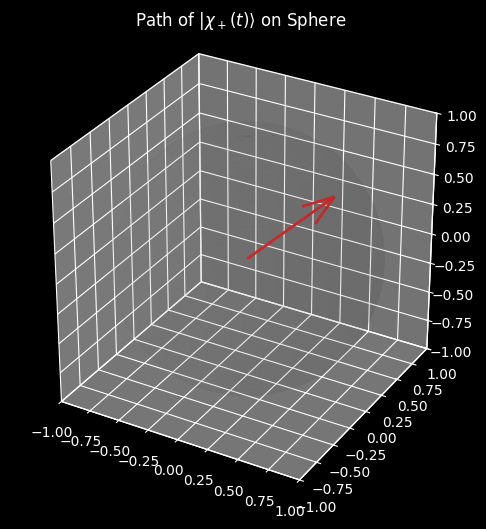

In [11]:
#p4 berry phase viz

#constants
alpha = np.radians(45)   #cone angle (same as before)
omega = 2 * np.pi        #angular velocity
frames = 100
t_vals = np.linspace(0, 2*np.pi/omega, frames)

#bloch vector direction
bloch_vectors = np.array([
    [
        np.sin(alpha) * np.cos(omega * t),
        np.sin(alpha) * np.sin(omega * t),
        np.cos(alpha)
    ] for t in t_vals
])

#setup
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_box_aspect([1,1,1])
ax.set_title('Path of $|\\chi_+(t)\\rangle$ on Sphere')

#bloch sphere for ref
u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, alpha=0.05, color='gray')

#plot initial vector
vec = ax.quiver(0, 0, 0, *bloch_vectors[0], color='tab:red', linewidth=2)

#path trace
trace, = ax.plot([], [], [], color='tab:blue', lw=2)

#update
def update(frame):
    global vec
    vec.remove()
    B = bloch_vectors[frame]
    vec = ax.quiver(0, 0, 0, *B, color='tab:red', linewidth=2)
    trace.set_data(bloch_vectors[:frame+1, 0], bloch_vectors[:frame+1, 1])
    trace.set_3d_properties(bloch_vectors[:frame+1, 2])
    return vec, trace

#ani
anim = FuncAnimation(fig, update, frames=frames, interval=100)
anim.save('berry_phase_and_mag.gif', writer='pillow', fps=30)


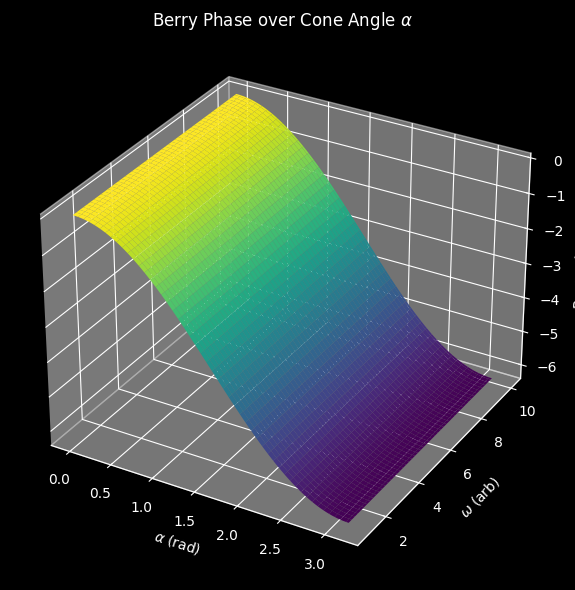

In [12]:
#berry meshgrid

#angle grid
alpha_vals = np.linspace(0, np.pi, 100)
omega_vals = np.linspace(1, 10, 100)  #not used but for surface plot easier

A, O = np.meshgrid(alpha_vals, omega_vals)
gamma_vals = -np.pi * (1 - np.cos(A))  #independent of omega

#plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, O, gamma_vals, cmap='viridis', edgecolor='none')
ax.set_title('Berry Phase over Cone Angle $\\alpha$')
ax.set_xlabel('$\\alpha$ (rad)')
ax.set_ylabel('$\\omega$ (arb)')
ax.set_zlabel('Berry Phase $\\gamma$')
plt.tight_layout()
plt.savefig('p4_berry_phase_meshgrid.png')

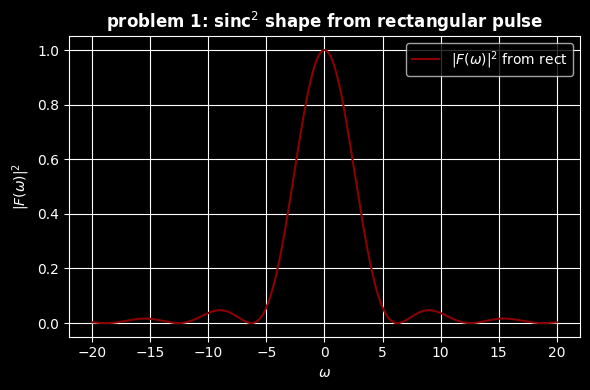

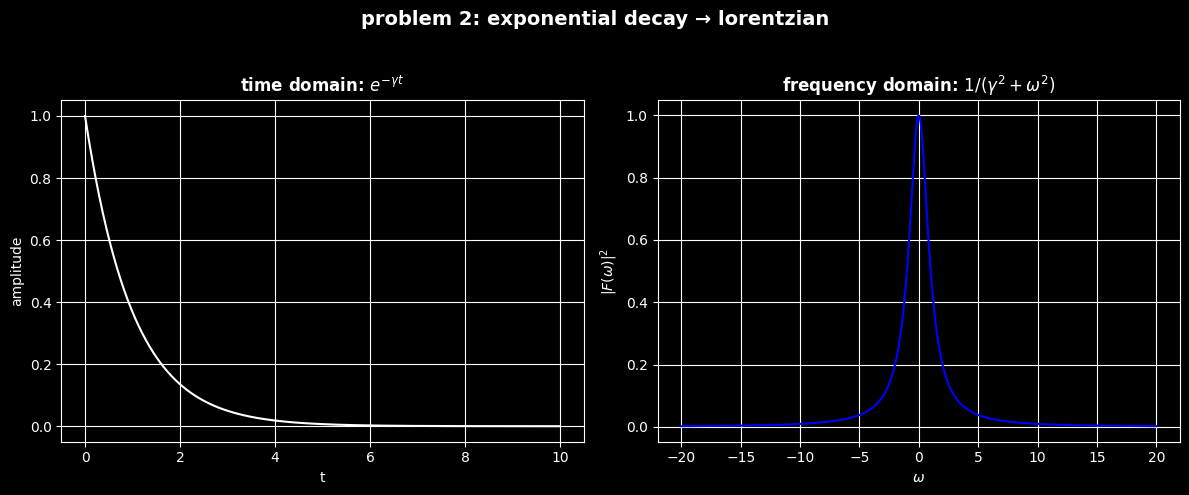

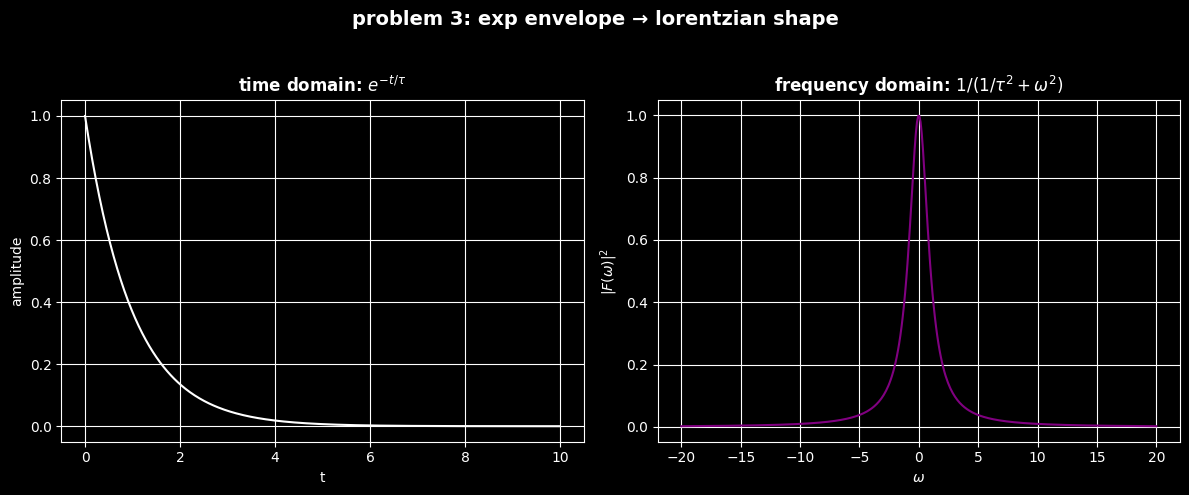

Moved p2_fourier_exponential.png to graphs
Moved p3_fourier_exp_to_lorentz.png to graphs
Moved p1_fourier_rectangular.png to graphs
Moved p1_T_evo_of_state_probs.png to graphs
Moved p4_berry_phase_meshgrid.png to graphs
Moved p3_transition_v_tau.png to graphs
Moved berry_phase_and_mag.gif to graphs


In [13]:
#setup
sp.init_printing()
t, omega, gamma, tau, sigma, T = sp.symbols('t omega gamma tau sigma T', real=True, positive=True)
alpha = sp.Symbol('alpha', real=True)

#p1: rect pulse → sinc²
def problem1():
    rect_expr = sp.Heaviside(t) - sp.Heaviside(t - T)
    F_omega = sp.integrate(sp.exp(sp.I * omega * t), (t, 0, T))
    F_simpl = sp.simplify(F_omega)

    T_val = 1.0
    omega_vals = np.linspace(-20, 20, 400)
    F_numeric = np.where(np.abs(omega_vals) < 1e-10,
                         T_val**2,
                         (2 * np.sin(omega_vals * T_val/2)/omega_vals)**2)

    plt.figure(figsize=(6, 4))
    plt.plot(omega_vals, F_numeric, label=r'$|F(\omega)|^2$ from rect', color='darkred')
    plt.title('problem 1: sinc$^2$ shape from rectangular pulse', fontweight='bold')
    plt.xlabel(r'$\omega$')
    plt.ylabel(r'$|F(\omega)|^2$')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('p1_fourier_rectangular.png')
    plt.show()

#p2:exp(-gamma*t) → lorentzian
def problem2():
    expr = sp.exp(-gamma * t)
    F = sp.integrate(expr * sp.exp(sp.I * omega * t), (t, 0, sp.oo))
    F_simpl = sp.simplify(F)

    gamma_val = 1.0
    t_vals = np.linspace(0, 10, 400)
    omega_vals = np.linspace(-20, 20, 400)
    decay = np.exp(-gamma_val * t_vals)
    lorentz = 1.0 / (gamma_val**2 + omega_vals**2)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(t_vals, decay, color='white')
    axs[0].set_title(r'time domain: $e^{-\gamma t}$', fontweight='bold')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('amplitude')
    axs[0].grid(True)
    axs[1].plot(omega_vals, lorentz, color='blue')
    axs[1].set_title(r'frequency domain: $1/(\gamma^2 + \omega^2)$', fontweight='bold')
    axs[1].set_xlabel(r'$\omega$')
    axs[1].set_ylabel(r'$|F(\omega)|^2$')
    axs[1].grid(True)
    plt.suptitle('problem 2: exponential decay → lorentzian', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('p2_fourier_exponential.png')
    plt.show()

#p3:exp(-t/τ) → same lorentz
def problem3():
    expr = sp.exp(-t/tau)
    F = sp.integrate(expr * sp.exp(sp.I * omega * t), (t, 0, sp.oo))
    F_simpl = sp.simplify(F)

    tau_val = 1.0
    t_vals = np.linspace(0, 10, 400)
    omega_vals = np.linspace(-20, 20, 400)
    decay = np.exp(-t_vals / tau_val)
    lorentz = 1.0 / ((1/tau_val)**2 + omega_vals**2)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(t_vals, decay, color='white')
    axs[0].set_title(r'time domain: $e^{-t/\tau}$', fontweight='bold')
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('amplitude')
    axs[0].grid(True)
    axs[1].plot(omega_vals, lorentz, color='purple')
    axs[1].set_title(r'frequency domain: $1/(1/\tau^2 + \omega^2)$', fontweight='bold')
    axs[1].set_xlabel(r'$\omega$')
    axs[1].set_ylabel(r'$|F(\omega)|^2$')
    axs[1].grid(True)
    plt.suptitle('problem 3: exp envelope → lorentzian shape', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('p3_fourier_exp_to_lorentz.png')
    plt.show()
problem1()
problem2()
problem3()

#move the plots
move_plots()